# <img src="http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16_files/machine_learning.jpg">
# Training a Perceptron model on iris dataset



Instead of using NumPy to calculate the vector dot product between two arrays a and b via a.dot(b) or numpy.dot(a,b), in Python would be sum([i8j] for i,j in zip(a,b)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_inter:int
        Passes over the training dataset
    
    Attributes
    w_ : 1d-array
        Weights after fitting
    errors_ : list 
        Number of misclassifications in every spoch"""
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self,x,y):
        """Fit training data
        Parameters
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y: array-like, shape = {n_sample}
            Targer values.

        Returns
        self: object"""
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0:] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calcualte net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0 , 1, -1)

50 Iris-Setosa and 50 Iris-Versicolor flowers. Class labels are converted into two integer class labels 1(Versicolor) and -1(Setosa), which are assigned to y where the value method of a pandas DataFrame yeilds the corresponding np representation. For the x axis the extracted features are (sepal, petal length)

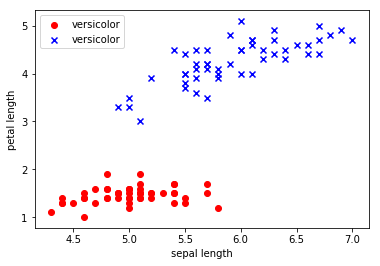

In [3]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()


y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)
X = df.iloc[0:100, [0,2]].values


plt.scatter(X[:50,0], X[:50,1], color='red', marker = 'o', label='versicolor')

plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker = 'x', label='versicolor')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()


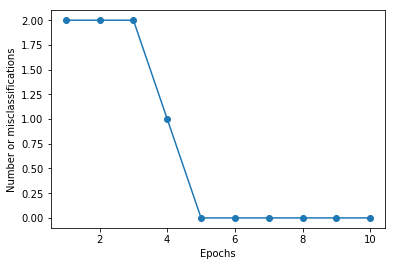

In [4]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit (X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number or misclassifications')

plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(7))])
    
    #plot the decision surface
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
                           
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

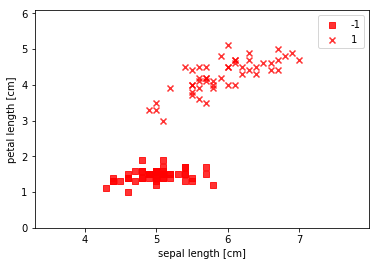

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper right')
plt.show()

In [7]:
#import numpy as np

class AdalineGD(object):
    """ADAptive Linear Neuron classifier.

    Parameters
    eta: float
        Learning rate (0.0 to 1.0)

    n_iter: int
        Passes over the training dataset.

    Attributes
    w_:1d-array
        weights after fitting.

    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X, y):
        """
        Parameters
        X: {array-like}, shape = [n_samples, n_features]
                    Training vectors, where n_samples is the number of samples and
                    n_features is the number of features.
            y: array-like, shape = {n_sample}
                    Target values.

            Returns
            self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

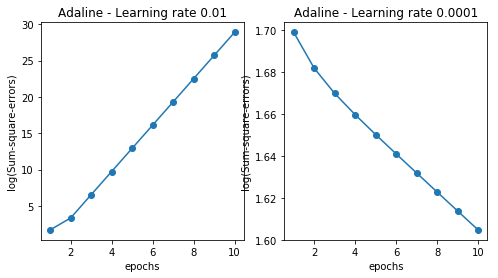

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('log(Sum-square-errors)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2  = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('log(Sum-square-errors)')
#ax[1].set_label_coords(0.5,1)
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

# Training perceptron via scikit-learn

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [10]:
iris = datasets.load_iris()
X= iris.data[:,[2,3]]
y= iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


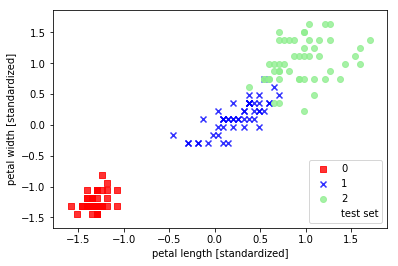

In [14]:
'''highlight the samples from the data set with marker generator and color map'''

#plot_decision regions as prev function with modification at the bottom
#ploting all the samples. Specifying the indecies of 
#the samples we want to mark on the resulting plot 


def plot_decision_regions0(X, y, classifier, test_idx=None, resolution=0.05):
    #marker gen and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    #plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c=cmap(idx), marker=markers[idx], label=cl)


    #highlight test samples
    if test_idx:
        X_test = X[test_idx, :]
        y_test = y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1], c='',alpha=1.0, linewidths=1, marker='o',s=55, label= 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions0(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='lower right')
plt.show()